<a href="https://colab.research.google.com/github/penguinhouse/AIFFEL_quest_iNho/blob/main/Node_project/CR6_ML_10/node10_MLproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 10. 머신러닝 프로젝트
Airbnb(New York City)

https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data
미국 NYC Airbnb 목록(2019)

프로젝트 목적: 가격 예측(price)

제공 데이터(3개): train.csv, test.csv, y_test(최종 채점용)

평가 방식: MSE (평균제곱오차/ 실제 값과 예측 값 차이 ->제곱해 평균)

<참고> : 6. 지도학습(회귀) 노드의 6-8. 평가(회귀) 스텝에서 복습하실 수 있습니다.

데이터 출처 바로가기 / License CC0: Public Domain

In [1]:
# 1. Baseline 모델

import pandas as pd
# 데이터 불러오기
train = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')

In [2]:
# 결측치 컬럼 삭제(last_review)
train = train.drop(columns=['last_review'], axis=1)
test = test.drop(columns=['last_review'], axis=1)

In [3]:
# 결측치 채우기
train['reviews_per_month'] = train['reviews_per_month'].fillna(0)
test['reviews_per_month'] = test['reviews_per_month'].fillna(0)

In [4]:
# 가격 값 복사
target = train['price']
train = train.drop(columns=['price'])

In [5]:
#수치형 데이터만 남기기
train = train.select_dtypes(include=['float64', 'int64'])
test = test.select_dtypes(include=['float64', 'int64'])

In [6]:
# 데이터 분할
from sklearn.model_selection import train_test_split
# 학습 데이터를 훈련 세트와 검증 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(train, target, test_size=0.2, random_state=2022)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(31292, 9) (7824, 9) (31292,) (7824,)


In [7]:
# 머신러닝(회귀)
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
model = LinearRegression()
model.fit(X_train, y_train)
# 검증 세트에 대한 예측 및 성능 측정
pred = model.predict(X_test)
mse = mean_squared_error(y_test, pred)
print(mse)

32000.46129367385


In [8]:
# 릿지 회귀
from sklearn.linear_model import Ridge
model = Ridge(alpha=1)
model.fit(X_train, y_train)
pred = model.predict(X_test)
mse = mean_squared_error(y_test, pred)
print(mse)

32002.920017957797


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.83227e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


In [9]:
# 라쏘 회귀
from sklearn.linear_model import Lasso
model = Lasso(alpha=1) # 기본값이 1
model.fit(X_train, y_train)
pred = model.predict(X_test)
mse = mean_squared_error(y_test, pred)
print(mse)

32695.800512555652


In [10]:
# 엘라스틱넷 회귀
from sklearn.linear_model import ElasticNet
model = ElasticNet(alpha=1) # 기본값이 1
model.fit(X_train, y_train)
pred = model.predict(X_test)
mse = mean_squared_error(y_test, pred)
print(mse)

33518.69672268709


In [11]:
# 랜덤 포레스트 회귀
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(random_state=2022)
model.fit(X_train, y_train)
pred = model.predict(X_test)
mse = mean_squared_error(y_test, pred)
print(mse)

30625.649624105314


In [12]:
# Xgboost
from xgboost import XGBRegressor
model = XGBRegressor(random_state=2022)
model.fit(X_train, y_train)
pred = model.predict(X_test)
mse = mean_squared_error(y_test, pred)
print(mse)

31084.500561502304


In [13]:
# test 데이터 예측 및 평가
y_test = pd.read_csv('y_test.csv')

# Xgboost
pred = model.predict(test)
mse = mean_squared_error(y_test, pred)
print(mse)

56366.491873153194


In [14]:
############################################# 2. 프로젝트 성능 향상 버전
# 라이브러리
import pandas as pd

In [34]:
# 데이터 불러오기
train = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test_1.csv')

In [35]:
#2.2. EDA(탐색적 데이터 분석)
# 데이터 크기
train.shape, test.shape

((39116, 16), (9779, 15))

In [36]:
# 데이터 샘플
display(train.head(2))
display(test.head(2))


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,14963583,Room in South Harlem near Central Park,94219511,Gilles,Manhattan,Harlem,40.80167,-73.95781,Private room,70,3,3,2019-01-01,0.09,2,0
1,9458704,"Large 1BR Apartment, near Times Sq (2nd Floor)",49015331,Iradj,Manhattan,Hell's Kitchen,40.76037,-73.99016,Entire home/apt,240,2,64,2019-06-30,1.68,2,262


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,30913224,"Cozy and Sunny Room Williamsburg, Luxury Building",33771081,Rémy,Brooklyn,Williamsburg,40.70959,-73.94652,Private room,3,2,2019-05-08,0.31,1,0
1,971247,Sunny Artist Live/Work Apartment,5308961,Larry,Manhattan,Upper West Side,40.79368,-73.96487,Entire home/apt,3,159,2019-07-03,2.09,1,244


In [37]:
# 데이터 타입
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39116 entries, 0 to 39115
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              39116 non-null  int64  
 1   name                            39104 non-null  object 
 2   host_id                         39116 non-null  int64  
 3   host_name                       39099 non-null  object 
 4   neighbourhood_group             39116 non-null  object 
 5   neighbourhood                   39116 non-null  object 
 6   latitude                        39116 non-null  float64
 7   longitude                       39116 non-null  float64
 8   room_type                       39116 non-null  object 
 9   price                           39116 non-null  int64  
 10  minimum_nights                  39116 non-null  int64  
 11  number_of_reviews               39116 non-null  int64  
 12  last_review                     

In [38]:
# 결측치(train)
train.isnull().sum()

id                                   0
name                                12
host_id                              0
host_name                           17
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       7994
reviews_per_month                 7994
calculated_host_listings_count       0
availability_365                     0
dtype: int64

In [39]:
# 결측치(test)
test.isnull().sum()

id                                   0
name                                 4
host_id                              0
host_name                            4
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
minimum_nights                       0
number_of_reviews                    0
last_review                       2058
reviews_per_month                 2058
calculated_host_listings_count       0
availability_365                     0
dtype: int64

<Axes: >

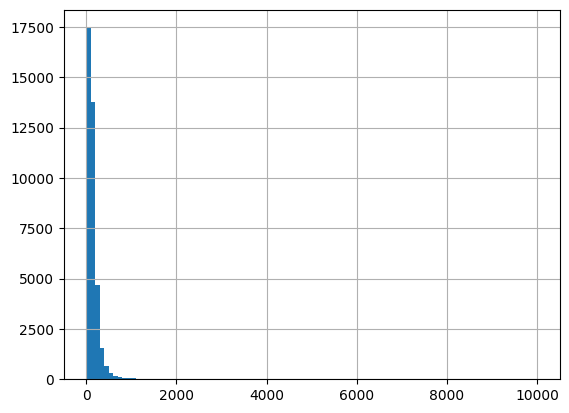

In [40]:
# target(hist)
train['price'].hist(bins=100)

In [41]:
# target(describe)
train['price'].describe()

count    39116.000000
mean       152.751150
std        241.752501
min          0.000000
25%         69.000000
50%        105.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

In [42]:
# 피처(host_id)
train['host_id'].value_counts()

219517861    256
107434423    181
30283594      99
137358866     82
12243051      80
            ... 
73369106       1
26620387       1
176660539      1
26004891       1
2609535        1
Name: host_id, Length: 30845, dtype: int64

<Axes: >

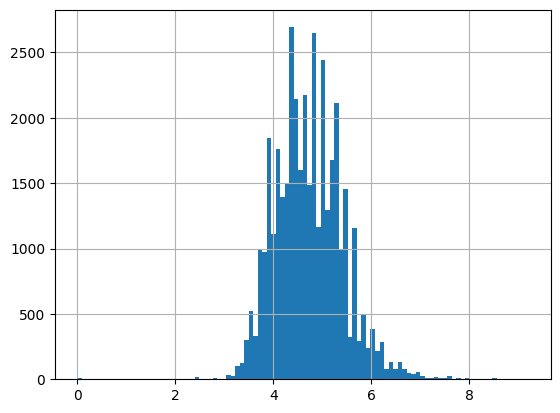

In [43]:
#3. 데이터 전처리
# 데이터를 살펴보고 판단하여 결측치 및 이상치를 처리
import numpy as np

train['price'] = np.log1p(train['price'])
train['price'].hist(bins=100)

In [44]:
# 결측치 컬럼 삭제(last_review)
train = train.drop('last_review', axis=1)
test = test.drop('last_review', axis=1)

In [45]:
# 결측치 채우기
train['reviews_per_month'] = train['reviews_per_month'].fillna(0)
test['reviews_per_month'] = test['reviews_per_month'].fillna(0)

In [46]:
# 결측치 확인
train.isnull().sum()

id                                 0
name                              12
host_id                            0
host_name                         17
neighbourhood_group                0
neighbourhood                      0
latitude                           0
longitude                          0
room_type                          0
price                              0
minimum_nights                     0
number_of_reviews                  0
reviews_per_month                  0
calculated_host_listings_count     0
availability_365                   0
dtype: int64

In [47]:
test.isnull().sum()

id                                0
name                              4
host_id                           0
host_name                         4
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [48]:
# 가격 값 복사
target = train['price']
train = train.drop('price', axis=1)

In [49]:
# 수치형 데이터와 범주형 데이터 분리
n_train = train.select_dtypes(exclude='object').copy()
c_train = train.select_dtypes(include='object').copy()
n_test = test.select_dtypes(exclude='object').copy()
c_test = test.select_dtypes(include='object').copy()
# 수치형 변수

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
cols = [
        'host_id',
        'latitude',
        'longitude',
        'minimum_nights',
        'number_of_reviews',
        'reviews_per_month',
        'calculated_host_listings_count',
        'availability_365'
        ]
n_train[cols] = scaler.fit_transform(n_train[cols])
n_test[cols] = scaler.transform(n_test[cols])
n_train = n_train.drop('id', axis=1)
n_test = n_test.drop('id', axis=1)

# 범주형 변수
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cols = [
        'neighbourhood_group',
        'neighbourhood',
        'room_type'
        ]
for col in cols:
    c_train[col] = le.fit_transform(c_train[col])
    c_test[col] = le.transform(c_test[col])

del_cols =['name','host_name']
c_train = c_train.drop(del_cols, axis=1)
c_test = c_test.drop(del_cols, axis=1)
display(c_train.head(1))

# 분리한 데이터 다시 합침
train = pd.concat([n_train, c_train], axis=1)
test = pd.concat([n_test, c_test], axis=1)
print(train.shape, test.shape)
train.head()

,neighbourhood_group,neighbourhood,room_type
0,2,94,1


(39116, 11) (9779, 11)


,host_id,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group,neighbourhood,room_type
0,0.343458,0.731742,0.539318,0.001601,0.004769,0.001538,0.003067,0.000000,2,94,1
1,0.178671,0.631633,0.478445,0.000801,0.101749,0.028718,0.003067,0.717808,2,95,0
2,0.001595,0.558041,0.449354,0.047238,0.001590,0.003419,0.000000,0.000000,2,209,0
3,0.013033,0.464162,0.579361,0.002402,0.379968,0.049402,0.003067,0.002740,1,13,0
4,0.045468,0.458611,0.543571,0.021617,0.000000,0.000000,0.000000,0.000000,1,13,1


In [50]:
# 4. 검증 데이터 분리
# Train 데이터로 학습(훈련), Validation(검증용) 데이터로 예측 성능 평가
# 데이터 분할
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(train, target, test_size=0.2, random_state=2022)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((31292, 11), (7824, 11), (31292,), (7824,))

In [51]:
# 머신러닝(회귀).렌덤포레스트
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

model = RandomForestRegressor(random_state=2022, n_estimators=200)
model.fit(X_train, y_train)
pred = model.predict(X_val)

pred = np.expm1(pred)
mse = mean_squared_error(y_val, pred)

print(mse)

23271.321545454648


In [52]:
# 릿지 회귀
from sklearn.linear_model import Ridge
model = Ridge(alpha=1)
model.fit(X_train, y_train)
pred = model.predict(X_val)

pred = np.expm1(pred)
mse = mean_squared_error(y_val, pred)

print(mse)

17829.74030552302


In [53]:
# 라쏘 회귀
from sklearn.linear_model import Lasso
model = Lasso(alpha=1) # 기본값이 1
model.fit(X_train, y_train)
pred = model.predict(X_val)
pred = np.expm1(pred)
mse = mean_squared_error(y_val, pred)
print(mse)

11928.698130033947


In [54]:
# 엘라스틱넷 회귀
from sklearn.linear_model import ElasticNet
model = ElasticNet(alpha=1) # 기본값이 1
model.fit(X_train, y_train)
pred = model.predict(X_val)

pred = np.expm1(pred)
mse = mean_squared_error(y_val, pred)

print(mse)

11961.380668636748


In [55]:
# XGBoost
from xgboost import XGBRegressor
model = XGBRegressor(n_estimators=1000, learning_rate=0.05, n_jobs=-1)
model.fit(X_train, y_train, eval_set=[(X_val, y_val)], verbose=100)
pred = model.predict(X_val)
pred = np.expm1(pred)
mse = mean_squared_error(y_val, pred)

print(mse)

[0]	validation_0-rmse:0.66707
[100]	validation_0-rmse:0.43127
[200]	validation_0-rmse:0.42739
[300]	validation_0-rmse:0.42612
[400]	validation_0-rmse:0.42519
[500]	validation_0-rmse:0.42509
[600]	validation_0-rmse:0.42488
[700]	validation_0-rmse:0.42503
[800]	validation_0-rmse:0.42530
[900]	validation_0-rmse:0.42574
[999]	validation_0-rmse:0.42629
23145.42659453476


In [56]:
# test 데이터 예측 및 평가
y_test = pd.read_csv('y_test.csv')

# Xgboost
pred = model.predict(test)
pred = np.expm1(pred)
mse = mean_squared_error(y_test, pred)
print(mse)

42485.31175562778


In [57]:
# baseline score(mse 51xxx) 보다 점수가 낮게 나오도록 도전해 보세요!
print(f"나의 점수는 (MSE {mse})입니다.")

나의 점수는 (MSE 42485.31175562778)입니다.


# Airbnb(New York City)

### - 머신러닝 기초 with 파이썬\_CR6

### - 10. 머신러닝 프로젝트

---

## 프로젝트 소감

```

-   Baseline을 참고하여 EDA(탐색적 데이터 분석), 데이터 전처리, 검증 데이터 분리 과정을 수행하였으며
    머신러닝 지도학습(회귀) 모델 렌덤포레스트, 릿지 회귀, 라쏘 회귀, 엘라스틱넷 회귀, XGBoost 를 사용하였고
    MSE 42485.31175562778 결과를 확인하였습니다.

-   머신러닝으로 무언가를 해 보는 첫 작업이라 가슴이 두근거리는 실습이었습니다.
    빠른 노드 학습속도에 미처 놓쳐 버렸던 기억들을 다시 복기해보며 한 걸음 더 나아가는 시간이었던 같습니다.
    실습을 진행하면서도 느낀 부분이지만 공부한 것을 잘 정리하고 필요할 땐 언제든지 복기해 볼 수 있는
    아키브 체계와 도구를 가져야겠다는 걸 절감했습니다. 물론 모든 걸 다 기억할 수 있으면 좋겠지만...

-   반복적으로 또 다른 데이터를 가지고 이후로도 분석작업을 계속 해 보며 숙달하고 다양한 방법들을 탐색해 보아야겠다는 생각입니다.
    강의 영상에서도 소개된 캐글사이트도 좋은 자료인 것 같고
    구입하고 아직 다 넘기지 못한 책들 속의 실전분석도 차근차근 해 보아야겠습니다.

```